In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
%matplotlib inline
plt.style.use('seaborn-white')

import statsmodels.api as sm
from patsy import dmatrices
import random as rn

In [2]:
auto = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [3]:
print(auto)


      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

In [4]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [6]:

mod_all = smf.ols("mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin", data = auto)
res_all = mod_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          2.04e-139
Time:                        14:11:54   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

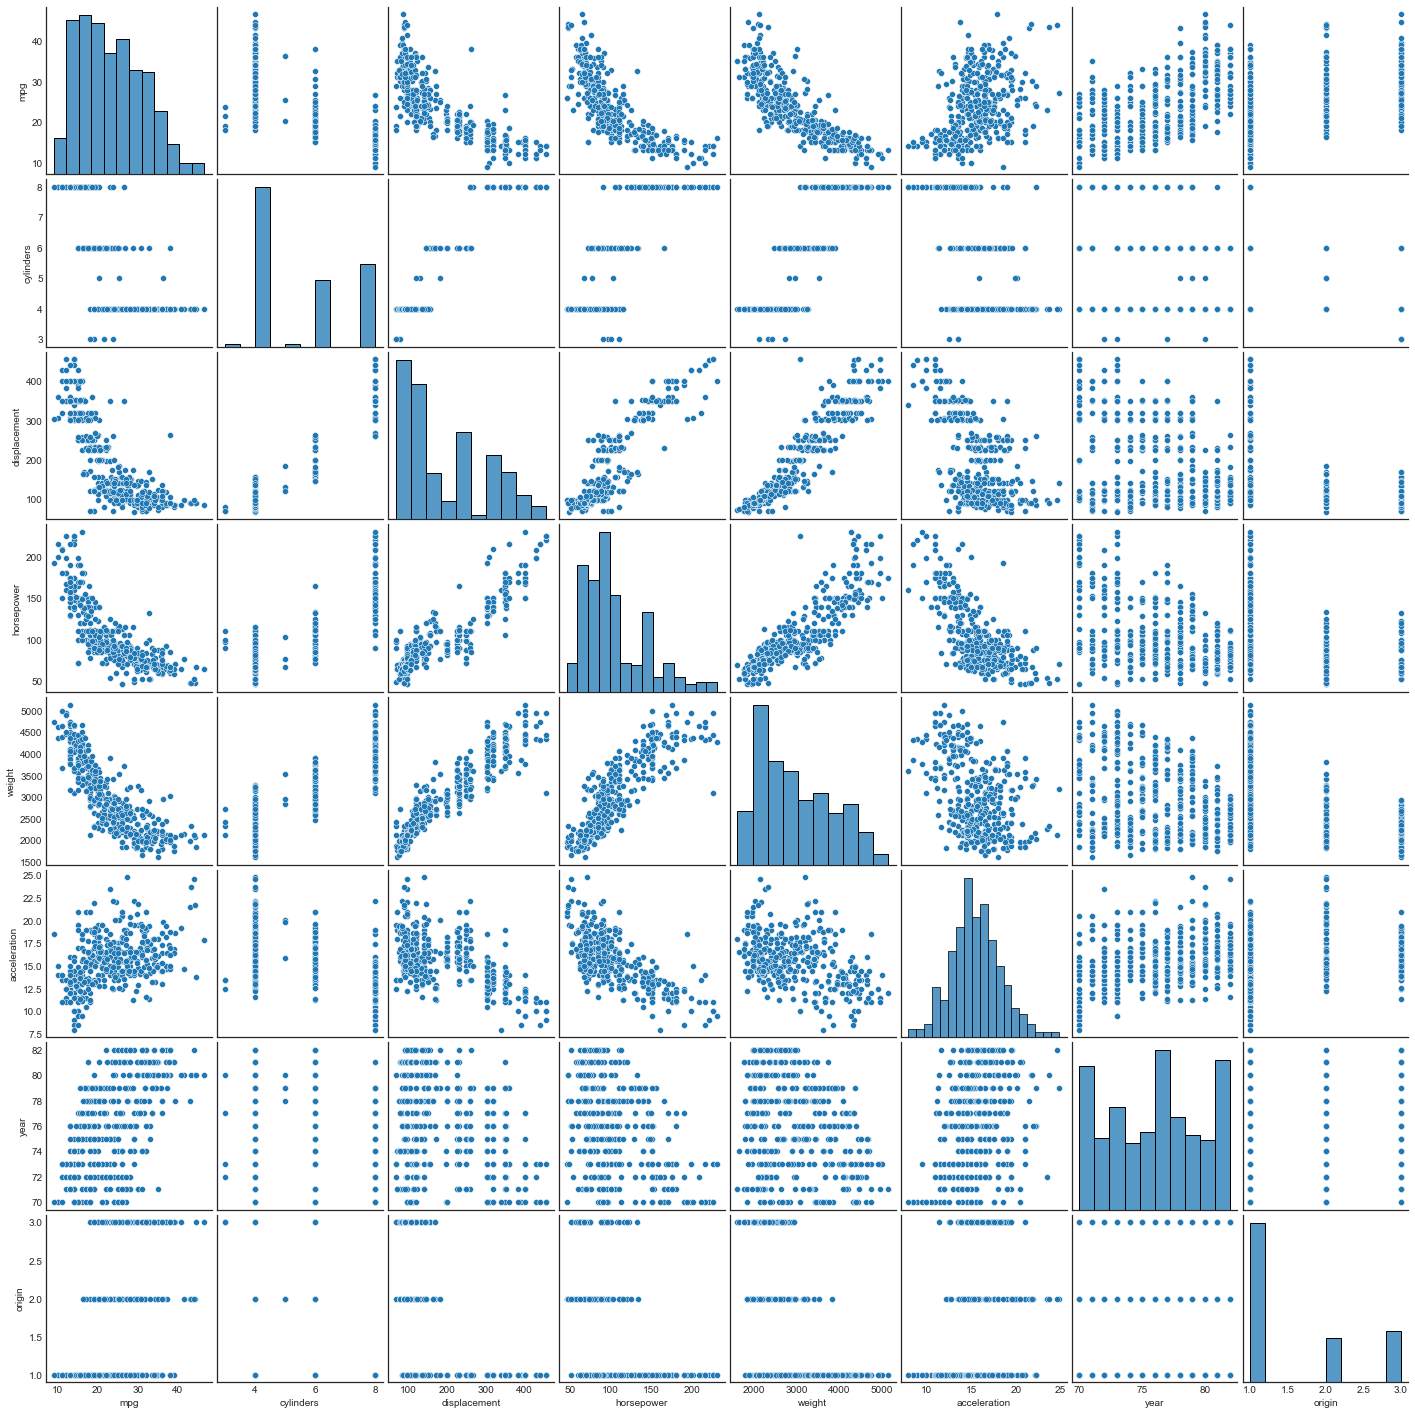

In [7]:
sns.pairplot(auto[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']]);


In [8]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,16900
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,27225
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,22500


In [9]:
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


In [10]:
auto['horsepower_half'] = auto.horsepower**0.5
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2,horsepower_half
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,16900,11.401754
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,27225,12.845233
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,22500,12.247449
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,22500,12.247449
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,19600,11.832160


In [11]:
est = smf.ols('mpg ~ horsepower + horsepower2+ horsepower_half', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,65.3559,23.054,2.835,0.005,20.029,110.682
horsepower,-0.3157,0.410,-0.770,0.442,-1.122,0.491
horsepower2,0.0010,0.001,1.810,0.071,-8.87e-05,0.002
horsepower_half,-2.1514,5.848,-0.368,0.713,-13.649,9.346


In [12]:

mod_all = smf.ols("mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin+horsepower2", data = auto)
res_all = mod_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     282.8
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          1.42e-155
Time:                        14:12:08   Log-Likelihood:                -982.41
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     383   BIC:                             2019.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3237      4.625      0.286   

In [13]:
auto['horsepower_log'] =np.log(auto.horsepower) 
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2,horsepower_half,horsepower_log
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,16900,11.401754,4.867534
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,27225,12.845233,5.105945
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,22500,12.247449,5.010635
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,22500,12.247449,5.010635
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,19600,11.832160,4.941642


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


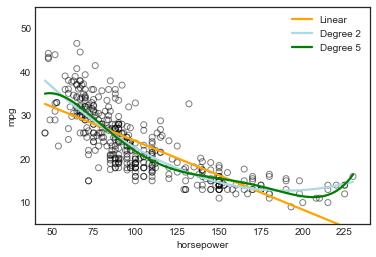

In [14]:

plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)

plt.xlim(40,240);

In [15]:

mod_all = smf.ols("mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin+horsepower2+horsepower_log", data = auto)
res_all = mod_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     259.0
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          1.20e-156
Time:                        14:12:09   Log-Likelihood:                -976.93
No. Observations:                 392   AIC:                             1974.
Df Residuals:                     382   BIC:                             2014.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         94.3430     28.632      3.

In [16]:
mod_all = smf.ols("mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin+horsepower2", data = auto)
res_all = mod_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     282.8
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          1.42e-155
Time:                        14:12:09   Log-Likelihood:                -982.41
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     383   BIC:                             2019.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3237      4.625      0.286   

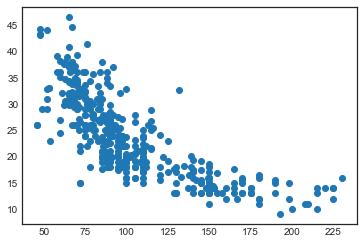

In [17]:

regr = skl_lm.LinearRegression()
x= auto.horsepower.values.reshape(-1,1)
y=auto.mpg
regr.fit(x,y)
plt.scatter(x,y)

In [18]:
auto['pred'] = regr.predict(x)
auto['residual'] = auto.mpg - auto.pred

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<AxesSubplot:xlabel='pred', ylabel='residual'>,)

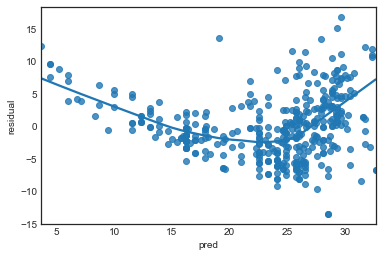

In [19]:
sns.regplot(auto.pred, auto.residual,lowess=True) ,


In [20]:

# Compute leverage values
design_mat = np.append(np.ones((x.shape[0], 1)), x, axis = 1)
hat_mat = design_mat @ np.linalg.inv(design_mat.T @ design_mat) @ design_mat.T
leverage_vals = hat_mat.diagonal()

Text(0, 0.5, 'residuals')

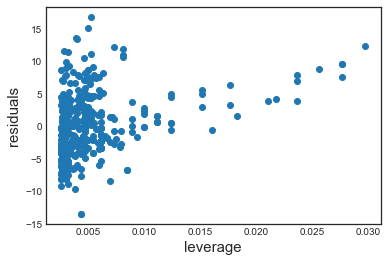

In [51]:
plt.scatter( leverage_vals,auto.residual,)
plt.xlabel("leverage",fontsize=15)
plt.ylabel("residuals",fontsize=15)

In [52]:
residual_standard_error = (np.sum(auto.residual**2)/(design_mat.shape[0] - design_mat.shape[1]))**0.5
standardise_residuals = auto.residual/(residual_standard_error*(1 - leverage_vals)**0.5)

Text(0, 0.5, 'standardised_residuals')

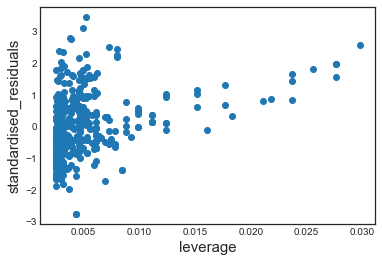

In [29]:
plt.scatter( leverage_vals ,standardise_residuals)
plt.xlabel("leverage",fontsize=15)
plt.ylabel("standardised_residuals",fontsize=15)

#Since there are 2-3 points above 3, these are the  outiers

In [35]:
mod_all = smf.ols("mpg~horsepower", data = auto)
result=mod_all.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        14:49:04   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
mod_all = smf.ols("mpg~horsepower+horsepower2", data = auto)
result=mod_all.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           5.40e-99
Time:                        14:49:08   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      0.000      53.360      60.440
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#As we are adding the variable hp2 , adjusted r2 value is increasing , so it is a useful predictor.

In [37]:
mod_all = smf.ols("mpg~horsepower+horsepower2+horsepower_half", data = auto)
result=mod_all.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     284.8
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.18e-97
Time:                        14:49:20   Log-Likelihood:                -1133.1
No. Observations:                 392   AIC:                             2274.
Df Residuals:                     388   BIC:                             2290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          65.3559     23.054      2.835      0.005      20.029     110.682
horsepower         -0.3157      0.410     -0.770      0.442      -1.122       0.491
horsepower2         0.0010      0.001      1.810      0.071   -8.87e-05       0.002
horsepower_half    -2.1514      5.848     -0.368      0.713     -13.649       9.346
==============================================================================
Omnibus:                       16.449   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.200
Skew:                           0.210   Prob(JB):                     1.02e-07
Kurtosis:                       4.340   Cond. No.                     1.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
mod_all = smf.ols("mpg~horsepower++horsepower_half", data = auto)
result=mod_all.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     423.0
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.59e-98
Time:                        14:49:30   Log-Likelihood:                -1134.8
No. Observations:                 392   AIC:                             2276.
Df Residuals:                     389   BIC:                             2287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         105.3158      6.647     15.845      0.000      92.248     118.384
horsepower          0.4191      0.059      7.144      0.000       0.304       0.534
horsepower_half   -12.4857      1.263     -9.883      0.000     -14.970     -10.002
==============================================================================
Omnibus:                       17.487   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.396
Skew:                           0.175   Prob(JB):                     4.60e-09
Kurtosis:                       4.493   Cond. No.                     3.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
mod_all = smf.ols("mpg~horsepower+horsepower_log", data = auto)
result=mod_all.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     416.6
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.98e-97
Time:                        14:50:16   Log-Likelihood:                -1136.8
No. Observations:                 392   AIC:                             2280.
Df Residuals:                     389   BIC:                             2292.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        156.0406     12.083     12.914      0.000     132.285     179.796
horsepower         0.1185      0.029      4.044      0.000       0.061       0.176
horsepower_log   -31.5982      3.284     -9.623      0.000     -38.054     -25.142
==============================================================================
Omnibus:                       17.484   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.245
Skew:                           0.162   Prob(JB):                     3.01e-09
Kurtosis:                       4.516   Cond. No.                     6.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#As we are adding the variable hplog and hp half, adjusted r2 value is increasing , so they are useful predictors.

In [33]:
mod_all = smf.ols("mpg~horsepower+horsepower2+horsepower_half+horsepower_log", data = auto)

In [34]:
result=mod_all.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.99e-98
Time:                        14:46:39   Log-Likelihood:                -1128.3
No. Observations:                 392   AIC:                             2267.
Df Residuals:                     387   BIC:                             2287.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -683.8915    243.904     -2.804      0.005   -1163.435    -204.348
horsepower         11.6464      3.898      2.988      0.003       3.982      19.311
horsepower2        -0.0074      0.003     -2.655      0.008      -0.013      -0.002
horsepower_half  -338.4598    109.153     -3.101      0.002    -553.067    -123.852
horsepower_log    651.4691    211.145      3.085      0.002     236.334    1066.605
==============================================================================
Omnibus:                       20.312   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.388
Skew:                           0.302   Prob(JB):                     4.62e-09
Kurtosis:                       4.409   Cond. No.                     2.46e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:

mod_all = smf.ols("mpg~cylinders+horsepower+cylinders*horsepower", data = auto)
res_all = mod_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     344.4
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          5.47e-109
Time:                        14:58:11   Log-Likelihood:                -1106.7
No. Observations:                 392   AIC:                             2221.
Df Residuals:                     388   BIC:                             2237.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               72.8151 

In [43]:

mod_all = smf.ols("mpg~cylinders+displacement+horsepower+cylinders*horsepower", data = auto)
res_all = mod_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     276.1
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          6.04e-112
Time:                        14:58:31   Log-Likelihood:                -1096.8
No. Observations:                 392   AIC:                             2204.
Df Residuals:                     387   BIC:                             2223.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               69.3729 

#adjusted r2 increases so better model.

In [47]:
mod_all = smf.ols("mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin+horsepower*acceleration", data = auto)
res_all = mod_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     253.2
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          8.74e-148
Time:                        15:01:03   Log-Likelihood:                -1000.8
No. Observations:                 392   AIC:                             2020.
Df Residuals:                     383   BIC:                             2055.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [49]:
mod_all = smf.ols("mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin*horsepower+horsepower*acceleration", data = auto)
res_all = mod_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     249.7
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          4.94e-154
Time:                        15:01:43   Log-Likelihood:                -983.12
No. Observations:                 392   AIC:                             1986.
Df Residuals:                     382   BIC:                             2026.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [50]:
mod_all = smf.ols("mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin*horsepower+horsepower*acceleration+horsepower*cylinders", data = auto)
res_all = mod_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     241.8
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          3.39e-158
Time:                        15:02:14   Log-Likelihood:                -970.34
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     381   BIC:                             2006.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

#as many interaction terms we keep adding , adj r2 value is increasing so the interactionn terms are useful here.